In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stock_code=input("Enter the code of the stock:")
data=yf.download(stock_code,"2008-01-01","2021-01-18",auto_adjust="True")
data.head()

Enter the code of the stock:NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,7.349,7.540,7.283,7.483,27299
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675


In [5]:
data.shape

(3283, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3283 entries, 2007-12-31 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3283 non-null   float64
 1   High    3283 non-null   float64
 2   Low     3283 non-null   float64
 3   Close   3283 non-null   float64
 4   Volume  3283 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.9 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000
mean,3.714812,3.788431,3.636149,3.708224,131365.895218
std,1.831245,1.866609,1.790444,1.826208,54415.091229
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691500,2.737000,2.644000,2.693000,91735.000000
50%,3.253000,3.313000,3.184000,3.242000,126609.000000
75%,4.158500,4.245000,4.068000,4.153000,161479.000000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


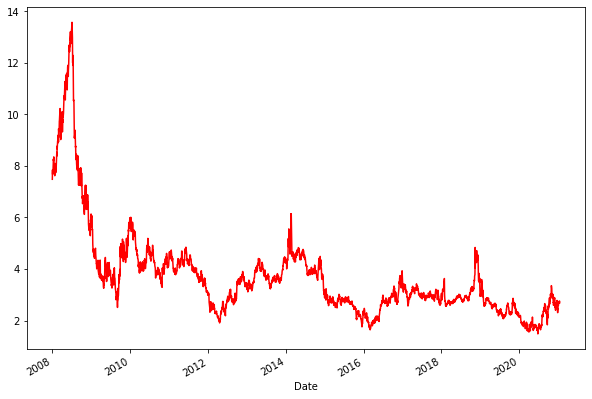

In [11]:
data.Close.plot(figsize=(10,7),color='r')
plt_ylabel=("{} Prices".format(stock_code))
plt_title=("{} Prices".format(stock_code))
plt.show()

c:\users\smoot\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

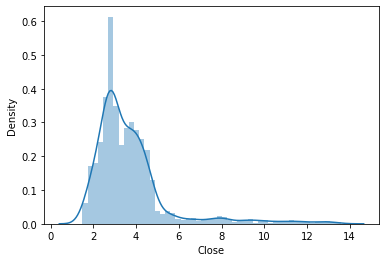

In [12]:
sns.distplot(data["Close"])

c:\users\smoot\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

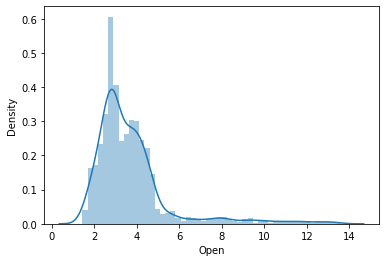

In [13]:
sns.distplot(data["Open"])

c:\users\smoot\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

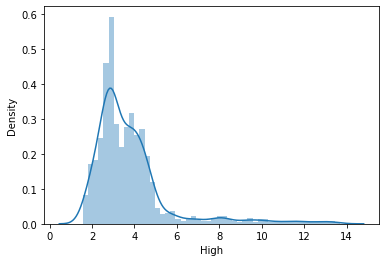

In [14]:
sns.distplot(data["High"])

In [19]:
X=data.drop("Close",axis=1)
y=data["Close"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(2626, 4)
(657, 4)
(657,)
(2626,)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
model.score(X_test,y_test)

0.9994903556172655

In [26]:
pred1=model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

#y_test==ground truth && y_pred==model predict 
def calculate_metric(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2_sco=r2_score(y_test,y_pred)
    print("MSE: ",mse)
    print("RMSE: ",rmse)
    print("r2_score: ",r2_sco)
    
calculate_metric(y_test,pred1)

MSE:  0.0013865447236576485
RMSE:  0.0372363360665043
r2_score:  0.9994903556172655


In [32]:
from sklearn.linear_model import Ridge,Lasso

In [36]:
model_ridge=Ridge().fit(X_train,y_train)
ridge_pred=model_ridge.predict(X_test)

In [38]:
model_lasso=Lasso().fit(X_train,y_train)
lasso_pred=model_lasso.predict(X_test)

In [39]:
calculate_metric(y_test,ridge_pred)

MSE:  0.0014485479006944042
RMSE:  0.03805979375527939
r2_score:  0.9994675654610237


In [40]:
calculate_metric(y_test,lasso_pred)

MSE:  0.230801915490566
RMSE:  0.4804184795473276
r2_score:  0.9151654485086913


In [43]:
data.iloc[:1]

,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,7.349,7.54,7.283,7.483,27299


In [44]:
X.iloc[:1]

,Open,High,Low,Volume
Date,,,,
2007-12-31,7.349,7.54,7.283,27299


In [50]:
model.predict([[7.349,7.54,7.283,27299]])

c:\users\smoot\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([7.45470522])